In [4]:
!kaggle datasets download -d ruchi798/data-science-job-salaries -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries


  0%|          | 0.00/7.37k [00:00<?, ?B/s]
100%|██████████| 7.37k/7.37k [00:00<?, ?B/s]



License(s): CC0-1.0



# Cleaning

In [5]:
import pandas as pd

df = pd.read_csv('ds_salaries.csv')

df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:

missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()

missing_values, duplicates


(Unnamed: 0            0
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
 0)

No missing values or duplicates

# Analysis

## Mean and median salaries for each group in the experience_level column

In [8]:
# Grouping by 'experience_level' and calculating the mean and median salaries
grouped_salaries = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median'])

grouped_salaries


,mean,median
experience_level,,
EN,61643.318182,56500.0
EX,199392.038462,171437.5
MI,87996.056338,76940.0
SE,138617.292857,135500.0


## A bar chart to visualize the average salaries for each experience level

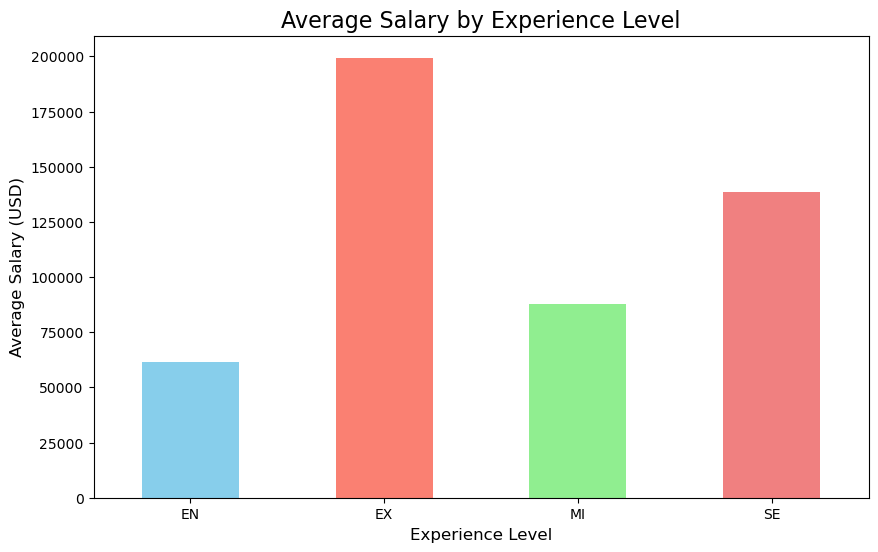

In [9]:
import matplotlib.pyplot as plt

# Create a bar chart visualizing the mean salaries for each experience level
plt.figure(figsize=(10,6))
grouped_salaries['mean'].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])

# Adding labels and title
plt.title('Average Salary by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.show()
